In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
portfolio_data = pd.read_csv("MT_data.csv")
portfolio_data.sample(10)

,Report_Date,Account #,DOB,ID_Type,Gender,Economic_Sector,Date_Granted,Expiry_Date,Principal Disbursed,Interest Disbursed,Principal_Paid,Interest_Paid,Principal_Balance,Interest_Balance,Agreed Weekly Installment,Date_Of_Last_Repayment,Date_Of_Next_Repayment,Branch_Code,OverDue_Age,ARREAS_AMOUNT (Principal + Interest)
682,8/30/22 0:00,11213001,1/1/77 0:00,NID,MALE,TRADING,7/12/22 0:00,10/4/22 0:00,"10,000.00","3,000.00","5,834.64","1,750.36","4,165.36","1,249.64","1,083.33",8/30/22 0:00,9/6/22 0:00,12,0,-
185,8/30/22 0:00,11113271,6/12/86 0:00,NID,FEMALE,TRADING,8/23/22 0:00,11/15/22 0:00,"10,000.00","3,000.00",-,-,"10,000.00","3,000.00","1,083.33",8/23/22 0:00,8/30/22 0:00,11,1,"1,083.33"
1557,8/30/22 0:00,1149751,10/26/87 0:00,NID,MALE,TRADING,8/15/22 0:00,11/7/22 0:00,"10,000.00","3,000.00","1,667.70",500.30,"8,332.30","2,499.70","1,083.33",8/29/22 0:00,9/5/22 0:00,14,0,-
349,8/30/22 0:00,1116091,2/2/64 0:00,NID,FEMALE,TRADING,6/16/22 0:00,9/8/22 0:00,"10,000.00","3,000.00","8,340.04","2,501.96","1,659.96",498.04,"1,083.33",8/25/22 0:00,9/1/22 0:00,11,0,-
983,8/30/22 0:00,1127321,6/19/83 0:00,NID,FEMALE,TRADING,6/8/22 0:00,8/31/22 0:00,"10,000.00","3,000.00","9,172.35","2,751.65",827.65,248.35,"1,083.33",8/24/22 0:00,8/31/22 0:00,12,0,-
639,8/30/22 0:00,11212161,8/24/86 0:00,NID,MALE,TRADING,7/12/22 0:00,10/4/22 0:00,"10,000.00","3,000.00","5,036.92","1,511.08","4,963.08","1,488.92","1,083.33",8/23/22 0:00,8/30/22 0:00,12,1,"1,083.33"
789,8/30/22 0:00,11214941,1/15/78 0:00,NID,FEMALE,TRADING,8/23/22 0:00,11/15/22 0:00,"15,000.00","4,500.00","1,250.00",375.00,"13,750.00","4,125.00","1,625.00",8/30/22 0:00,9/6/22 0:00,12,0,-
1433,8/30/22 0:00,1147801,4/24/82 0:00,NID,FEMALE,TRADING,7/20/22 0:00,10/12/22 0:00,"40,000.00","12,000.00","16,949.25","5,084.75","23,050.75","6,915.25","4,333.33",8/24/22 0:00,8/31/22 0:00,14,0,-
516,8/30/22 0:00,1119481,1/7/00 0:00,NID,FEMALE,TRADING,7/4/22 0:00,9/26/22 0:00,"10,000.00","3,000.00","6,670.80","2,001.20","3,329.20",998.80,"1,083.33",8/29/22 0:00,9/5/22 0:00,11,0,-
451,8/30/22 0:00,1118181,1/1/86 0:00,NID,MALE,TRADING,7/1/22 0:00,9/23/22 0:00,"80,000.00","24,000.00","53,335.36","16,000.64","26,664.64","7,999.36","8,666.67",8/26/22 0:00,9/2/22 0:00,11,0,-


In [2]:
portfolio_data['Principal_Balance'].dtype # principal balance data type
portfolio_data['Principal_Balance'] = portfolio_data['Principal_Balance'].str.replace(',', '').astype(float) # convert principal balance to float

In [3]:
# number of customers by gender 
principal_Balance_by_gender =  portfolio_data.groupby(["Gender"])['Principal_Balance'].sum()
economic_sectors_count =  portfolio_data.groupby(["Economic_Sector"])['Principal_Balance'].sum()
principal_Balance_by_id_type =  portfolio_data.groupby(["ID_Type"])['Principal_Balance'].sum()
principal_Balance_by_branch =  portfolio_data.groupby(["Branch_Code"])['Principal_Balance'].sum()


portfolio_data['DOB'] = portfolio_data['DOB'].str.replace('/', '-')
portfolio_data['DOB'] = portfolio_data['DOB'].str.split(' ').str[0] # remove the the time from the date of birth
portfolio_data['DOB'] = pd.to_datetime(portfolio_data['DOB'], format='%m-%d-%y') # format the year full date
portfolio_data['DOB'] = portfolio_data['DOB'].astype(str) # convert the dob to string


## Principal Balance by Gender

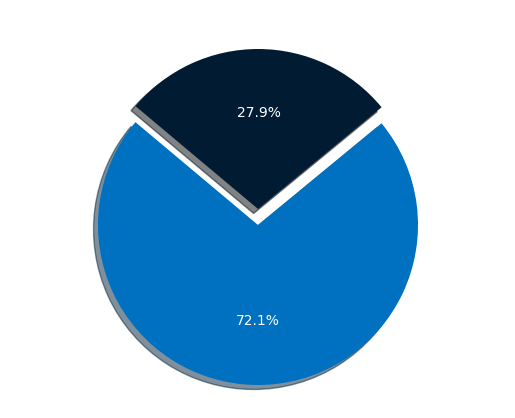

In [86]:
principal_Balance_by_gender
labels = ['FEMALE', 'MALE']
# sizes = [count_success_transactions, count_unsuccess_transactions]
explode = (0.1, 0)
# change text color to white
plt.rcParams['text.color'] = 'white'

plt.pie(principal_Balance_by_gender, explode=explode, labels=labels, colors= ['#0070C0', '#011B33', '#5D8BF4', '#FFBCBC',  '#DFF6FF', '#F38BA0'] , autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage breakdown of portfolio balance by Gender​')
plt.show()

## Economic Sectors Count

In [5]:
economic_sectors_count
# Percentage of eace sector
for i in range(len(economic_sectors_count)):
    print(economic_sectors_count.index[i], ":", round(economic_sectors_count[i]/economic_sectors_count.sum()*100, 2), "%")

AGRICULTURE : 0.37 %
SERVICES : 0.89 %
TRADING : 98.67 %
TRANSPORT : 0.06 %


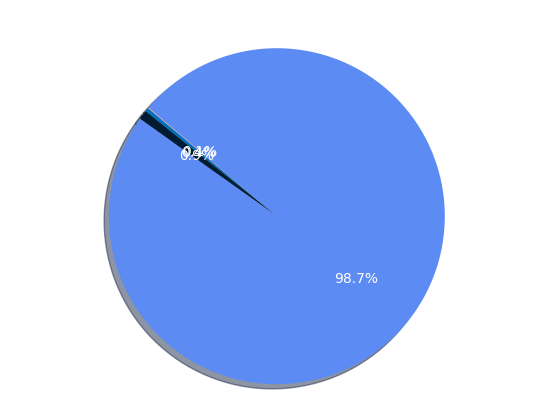

In [91]:
economic_sectors_count
# labels = ['FEMALE', 'MALE']
# sizes = [count_success_transactions, count_unsuccess_transactions]
# explode = (0.1, 0)
# change text color to white
plt.rcParams['text.color'] = 'black'

plt.pie(economic_sectors_count,  colors= ['#0070C0', '#011B33', '#5D8BF4', '#FFBCBC',  '#DFF6FF', '#F38BA0'] , autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage breakdown of portfolio balance by economic sectors')
plt.show()

In [102]:
principal_Balance_by_id_type

ID_Type
NID         14966490.09
PASSPORT       18307.69
Name: Principal_Balance, dtype: float64

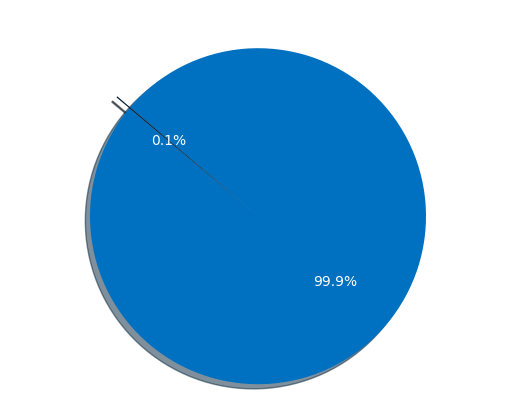

In [101]:
principal_Balance_by_id_type

# sizes = [count_success_transactions, count_unsuccess_transactions]
explode = (0.1, 0)
# change text color to white
plt.rcParams['text.color'] = 'white'

plt.pie(principal_Balance_by_id_type, explode=explode, colors= ['#0070C0', '#011B33', '#5D8BF4', '#FFBCBC',  '#DFF6FF', '#F38BA0'] , autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage breakdown of portfolio balance by Gender​')
plt.show()




In [103]:
principal_Balance_by_branch

Branch_Code
11    5717362.35
12    4704924.53
14    4562510.90
Name: Principal_Balance, dtype: float64

In [105]:

for i in range(len(principal_Balance_by_branch)):
    print(principal_Balance_by_branch.index[i], ":", round(principal_Balance_by_branch[i]/principal_Balance_by_branch.sum()*100, 2), "%")

KeyError: 0

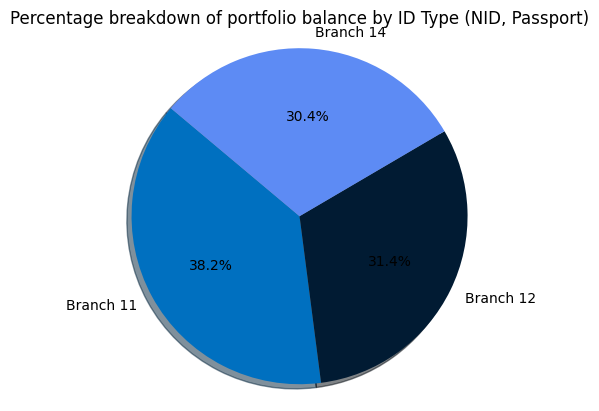

In [108]:
plt.rcParams['text.color'] = 'black'

labels =   ["Branch 11", "Branch 12",  "Branch 14",]

plt.pie(principal_Balance_by_branch,
labels=labels,
  colors= ['#0070C0', '#011B33', '#5D8BF4', '#FFBCBC',  '#DFF6FF', '#F38BA0'] , autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage breakdown of portfolio balance by ID Type (NID, Passport)​​')
plt.show()

In [51]:
# convert date of birth to age 

from datetime import datetime
from dateutil.relativedelta import relativedelta

def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

portfolio_data['Age'] = portfolio_data['DOB'].apply(lambda x: calculate_age(datetime.strptime(x, '%Y-%m-%d')))

portfolio_data['Age_Group'] = pd.cut(portfolio_data['Age'], bins=[0, 25, 35, 45, 55, 56], labels=['0-25', '25-35', '35-45', '45-55', '55+'])


## PAR 15 (% of portfolio balance that is more than 15 days overdue)​

In [109]:

overdue_15 = portfolio_data[portfolio_data['OverDue_Age'] > 15].count() # count of where OverDue_Age is greater than 15
overdue_15_percentage = (overdue_15['OverDue_Age'] / portfolio_data['OverDue_Age'].count()) * 100  # percentage of overdue 15
round(overdue_15_percentage, 2) # round to 2 decimal places
len(portfolio_data) - 13

0.83

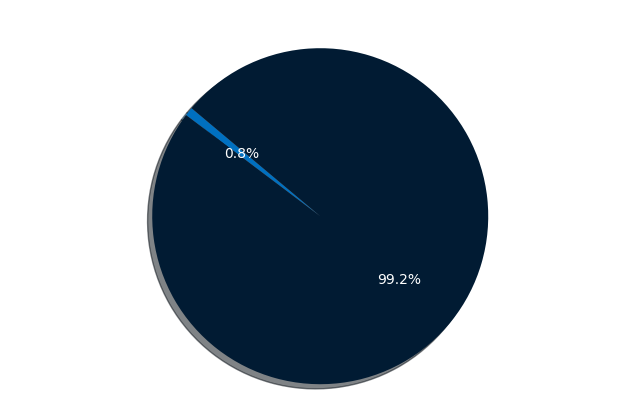

In [110]:
labels =   ["Overdue above 15 days", "Others",]

plt.rcParams['text.color'] = 'white'
plt.pie([overdue_15_percentage, 100-overdue_15_percentage],
labels=labels,
  colors= ['#0070C0', '#011B33', '#5D8BF4', '#FFBCBC',  '#DFF6FF', '#F38BA0'] , autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage breakdown of portfolio balance by ID Type (NID, Passport)​​')
plt.show()

PAR 15 (% of portfolio balance that is more than 15 days overdue) by loan size (Principal
Disbursed)
○ 10,000 - 100,000
○ 100,001 - 200,000
○ 200,001 - 300,000

## % of Portfolio Balance that is in Arrears

## Number of customers in portfolio by:

Gender
Economic Sector
ID Type (NID, Passport)
Age group (0-25; 26-35; 36-45; 46-55; >55)
Branch (11,12, 14)

In [79]:
cutomer_count_by_gender = portfolio_data.groupby(["Gender"]).count()
cutomer_count_by_eco_sector = portfolio_data.groupby(["Economic_Sector"]).count()
cutomer_count_by_id_type = portfolio_data.groupby(["ID_Type"]).count()
cutomer_count_by_age_group = portfolio_data.groupby(["Age_Group"]).count()
cutomer_count_by_branch = portfolio_data.groupby(["Branch_Code"]).count()